# Regression Notebook

### Feature Definitions and Explanation

1. **Price ($)**: 
   - The target variable representing the price of the laptop in dollars. It is the variable we aim to predict using the other features.
   
2. **Brand**:
   - The brand of the laptop (e.g., Razer, HP, Apple). This is a categorical feature and is encoded using one-hot encoding to avoid introducing any ordinal relationship between brands.

3. **Processor**:
   - The type of processor in the laptop (e.g., Intel, AMD). This feature is also categorical and is encoded similarly to the 'Brand' feature.

4. **Storage**:
   - The storage capacity of the laptop (e.g., 512GB SSD, 1TB HDD). Like 'Brand' and 'Processor', this is a categorical feature encoded into multiple binary columns.

5. **GPU (Graphics Processing Unit)**:
   - Describes the type of GPU used in the laptop (e.g., NVIDIA, Integrated). This is another categorical feature that is one-hot encoded.

6. **Operating System**:
   - The operating system the laptop runs on (e.g., Windows, MacOS, Linux). This is encoded using one-hot encoding as well.

7. **Resolution**:
   - The screen resolution of the laptop (e.g., 1920x1080). This feature is split into two numerical columns: `Resolution_Width` and `Resolution_Height`.

### Preprocessing Steps

- **Outlier Handling**: 
   The Price feature was capped using the Interquartile Range (IQR) method to remove extreme outliers that could distort model predictions.
   
- **One-Hot Encoding**:
   Categorical features like 'Brand', 'Processor', 'Storage', 'GPU', and 'Operating System' were one-hot encoded, which helps the model understand the relationship between categorical values.

- **Feature Scaling**:
   Numerical features were scaled using StandardScaler to ensure that they all have a similar scale, which is important for the performance of the linear regression model.

### Model Choice

- **Linear Regression**: 
   A linear regression model was chosen due to its simplicity and effectiveness in predicting continuous variables like price. It works well with numerical and categorical features once properly encoded and scaled.


In [ ]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Load the data
df = pd.read_csv('laptop_prices.csv')
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [162]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM (GB),11768.0,24.852821,21.762567,4.00,8.000,16.000,32.00,64.00
Screen Size (inch),11768.0,15.212305,1.436997,13.30,14.000,15.600,16.00,17.30
Battery Life (hours),11768.0,8.027855,2.305400,4.00,6.000,8.000,10.00,12.00
Weight (kg),11768.0,2.341117,0.667921,1.20,1.760,2.340,2.91,3.50
Price ($),11768.0,2183.571608,1316.886132,279.57,1272.045,1840.865,2698.37,10807.88


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


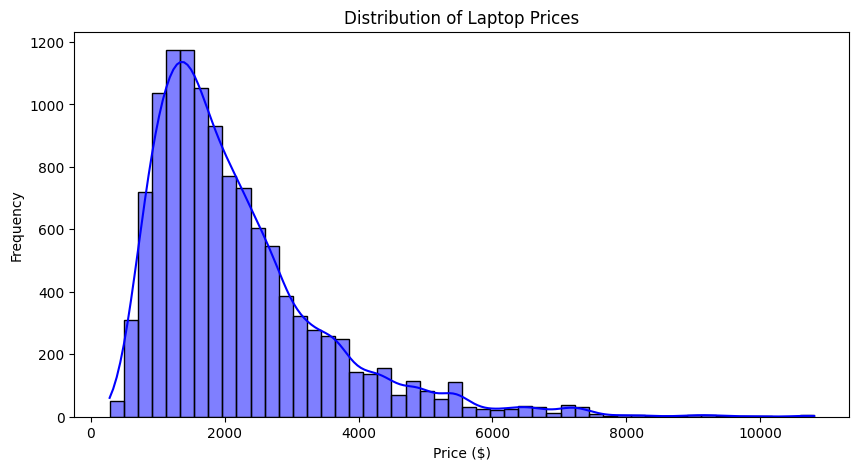

In [ ]:
#Distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(df["Price ($)"], bins=50, kde=True, color="blue")
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

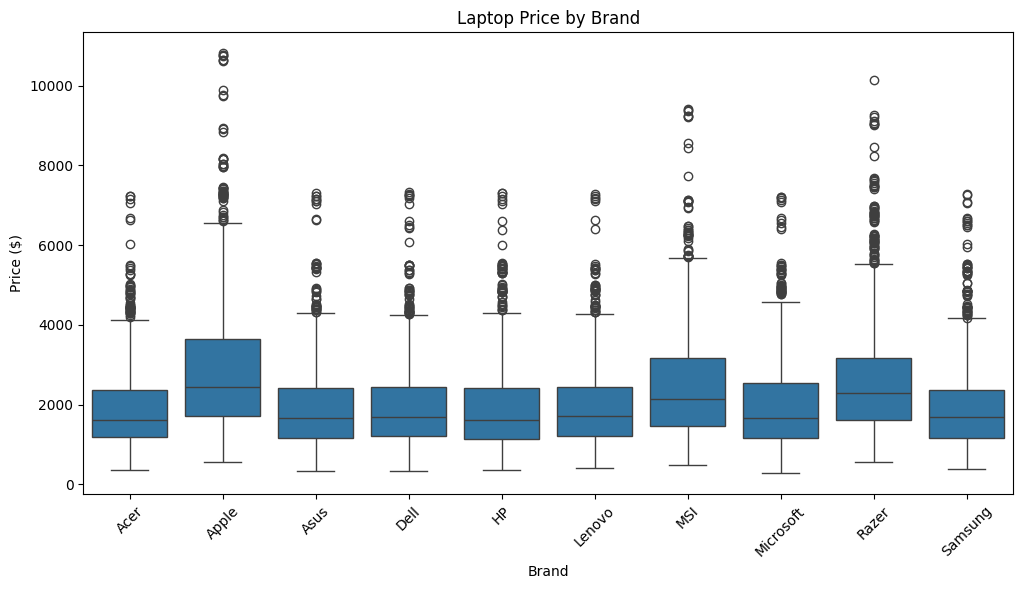

In [166]:
#Boxplot of Price by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x="Brand", y="Price ($)", data=df, order=df.groupby("Brand")["Price ($)"].median().index)
plt.xticks(rotation=45)
plt.title("Laptop Price by Brand")
plt.show()

In [167]:
#Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Price ($)'].quantile(0.25)
Q3 = df['Price ($)'].quantile(0.75)
IQR = Q3 - Q1

#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Capping the Price
df['Price ($)'] = np.where(df['Price ($)'] > upper_bound, upper_bound, df['Price ($)'])
df['Price ($)'] = np.where(df['Price ($)'] < lower_bound, lower_bound, df['Price ($)'])

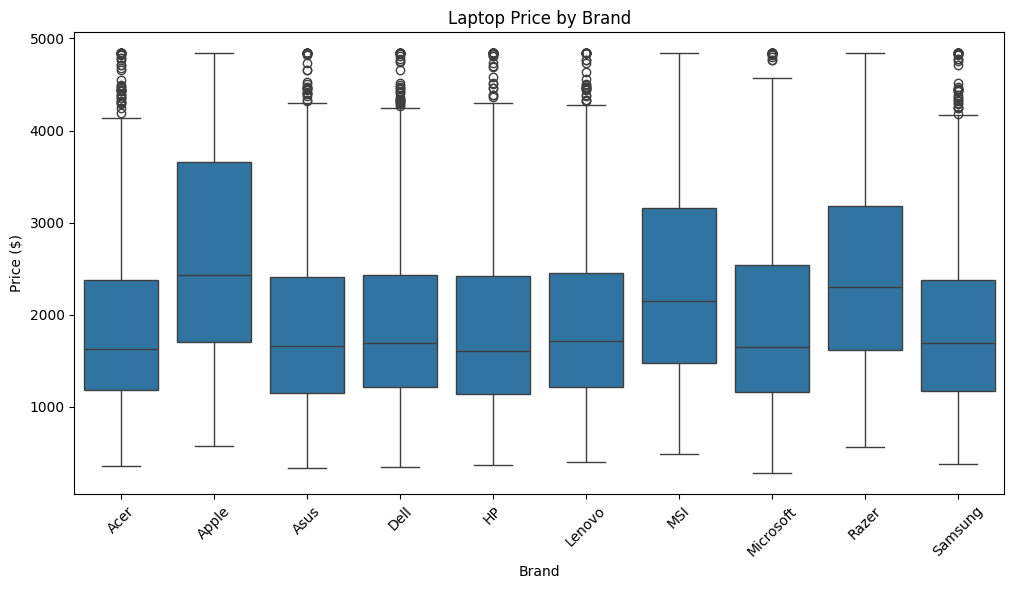

In [168]:
#Boxplot of Price by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x="Brand", y="Price ($)", data=df, order=df.groupby("Brand")["Price ($)"].median().index)
plt.xticks(rotation=45)
plt.title("Laptop Price by Brand")
plt.show()

In [169]:
#Extract numerical features from Resolution
df["Resolution_Width"] = df["Resolution"].apply(lambda x: int(x.split("x")[0]))
df["Resolution_Height"] = df["Resolution"].apply(lambda x: int(x.split("x")[1]))
df.drop(columns=["Resolution"], inplace=True)

In [170]:
#Encode categorical variables
categorical_features = ["Brand", "Processor", "Storage", "GPU", "Operating System"]
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_features]), columns=encoder.get_feature_names_out())

In [171]:
#Merge encoded features and drop original categorical columns
df = df.drop(columns=categorical_features).reset_index(drop=True)
df = pd.concat([df, encoded_features], axis=1)

In [193]:
#Split dataset
X = df.drop(columns=["Price ($)"])
y = df["Price ($)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [194]:
#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [195]:
#Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [196]:
#Predictions
y_pred = model.predict(X_test_scaled)

In [197]:
#Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R² Score: 0.9316
Mean Absolute Error: 230.50
Root Mean Squared Error: 295.79


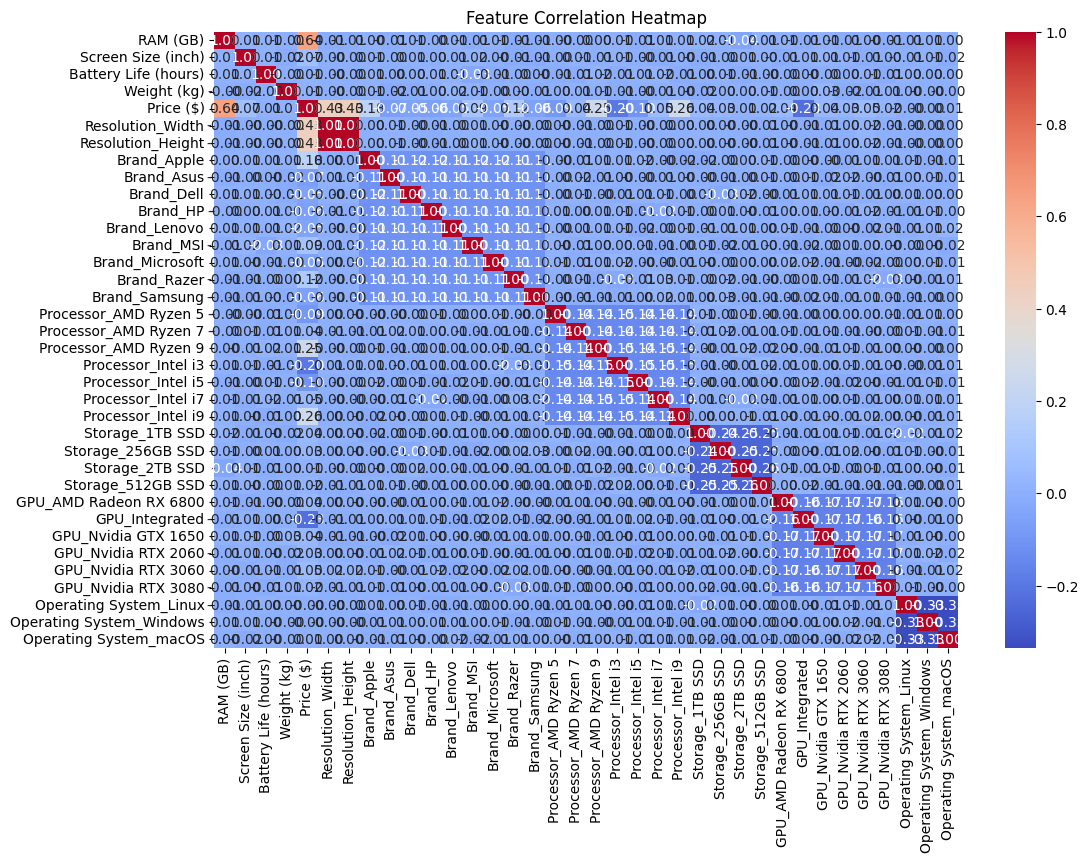

In [198]:
#Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

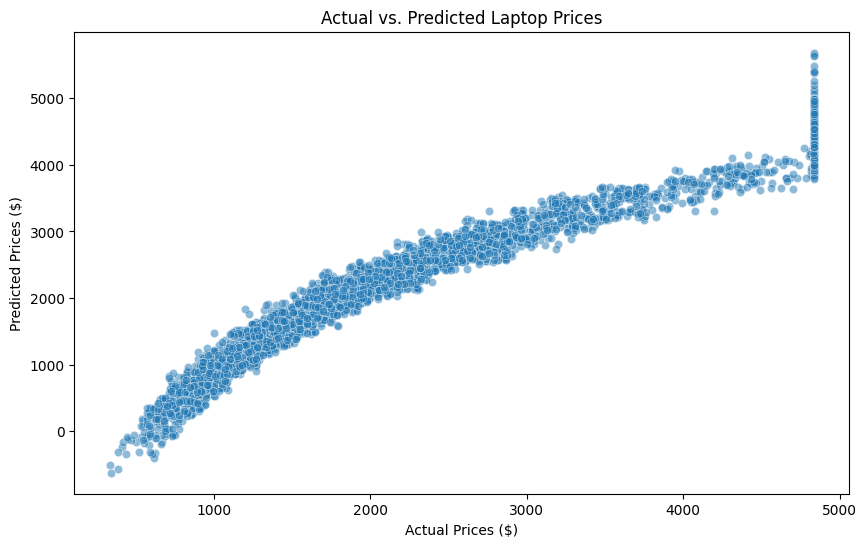

In [199]:
#Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual vs. Predicted Laptop Prices")
plt.show()

#### 2. **Model Performance**
- **R² Score**: **0.9316**  
   The R² score of 0.9316 indicates that approximately 93.16% of the variance in laptop prices is explained by the model, showing that the model is a strong predictor of price based on the features used.
   
- **Mean Absolute Error (MAE)**: **230.50**  
   The Mean Absolute Error (MAE) is 230.50, meaning that the model's predictions, on average, deviate from actual prices by $230.50. This is a reasonable error margin considering the complexity of the data.

- **Root Mean Squared Error (RMSE)**: **295.79**  
   The RMSE value of 295.79 suggests that the model tends to make larger prediction errors occasionally, but the overall performance is still strong.